In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("coffee-house-satisfactory-survey.csv")

In [3]:
df.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Coffee House?,6. How do you usually enjoy Coffee House?,7. How much time do you normally spend during your visit?,8. The nearest Coffee House's outlet to you is...?,9. Do you have Coffee House membership card?,...,"11. On average, how much would you spend at Coffee House per visit?","12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Coffee House?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)",16. You rate the WiFi quality at Coffee House as..,"17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)",18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Coffee House? Check all that apply.,20. Will you continue buying Coffee House?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [4]:
df.columns

Index(['Timestamp', '1. Your Gender', '2. Your Age',
       '3. Are you currently....?', '4. What is your annual income?',
       '5. How often do you visit Coffee House?',
       '6. How do you usually enjoy Coffee House?',
       '7. How much time do you normally  spend during your visit?',
       '8. The nearest Coffee House's outlet to you is...?',
       '9. Do you have Coffee House membership card?',
       '10. What do you most frequently purchase at Coffee House?',
       '11. On average, how much would you spend at Coffee House per visit?',
       '12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
       '13. How would you rate the price range at Coffee House?',
       '14. How important are sales and promotions in your purchase decision?',
       '15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)',
       '16. You rate the WiFi quality at Coffee House as..',
       '17. How 

## Renaming the columns for better readability

In [5]:
column_names = {'Timestamp' : 'date',
                '1. Your Gender' : 'gender', 
                '2. Your Age' : 'age',
                '3. Are you currently....?' : "customer_type",
                '4. What is your annual income?' : "annual_income",
                '5. How often do you visit Coffee House?' : "visits",
                '6. How do you usually enjoy Coffee House?' : "drink_preference",
                '7. How much time do you normally  spend during your visit?' : "time_spend",
                "8. The nearest Coffee House's outlet to you is...?" : "nearest_outlet",
                '9. Do you have Coffee House membership card?' : "membership",
                '10. What do you most frequently purchase at Coffee House?' : "most_bought",
                '11. On average, how much would you spend at Coffee House per visit?' : "spend_per_visit",
                '12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:' : "quality_rating",
                '13. How would you rate the price range at Coffee House?' : "price_rating",
                '14. How important are sales and promotions in your purchase decision?' : "promotion_rating",
                '15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)' : "ambience_rating",
                '16. You rate the WiFi quality at Coffee House as..' : "wifi_rating",
                '17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)' : "service_rating",
                '18. How likely you will choose Coffee House for doing business meetings or hangout with friends?' : "prefer_coffee_house",
                '19. How do you come to hear of promotions at Coffee House? Check all that apply.' : "promotion_updates",
                '20. Will you continue buying Coffee House?' : "loyalty"}

In [6]:
df.rename(columns =column_names, inplace=True)
df.head()

,date,gender,age,customer_type,annual_income,visits,drink_preference,time_spend,nearest_outlet,membership,...,spend_per_visit,quality_rating,price_rating,promotion_rating,ambience_rating,wifi_rating,service_rating,prefer_coffee_house,promotion_updates,loyalty
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [7]:
""# dropping the column Timestamp as it is an irrelevant column
df.drop("date",axis = 1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               122 non-null    object
 1   age                  122 non-null    object
 2   customer_type        122 non-null    object
 3   annual_income        122 non-null    object
 4   visits               122 non-null    object
 5   drink_preference     121 non-null    object
 6   time_spend           122 non-null    object
 7   nearest_outlet       122 non-null    object
 8   membership           122 non-null    object
 9   most_bought          122 non-null    object
 10  spend_per_visit      122 non-null    object
 11  quality_rating       122 non-null    int64 
 12  price_rating         122 non-null    int64 
 13  promotion_rating     122 non-null    int64 
 14  ambience_rating      122 non-null    int64 
 15  wifi_rating          122 non-null    int64 
 16  service_

In [9]:
df.isnull().sum()

gender                 0
age                    0
customer_type          0
annual_income          0
visits                 0
drink_preference       1
time_spend             0
nearest_outlet         0
membership             0
most_bought            0
spend_per_visit        0
quality_rating         0
price_rating           0
promotion_rating       0
ambience_rating        0
wifi_rating            0
service_rating         0
prefer_coffee_house    0
promotion_updates      1
loyalty                0
dtype: int64

## Replacing the null values with the mode value

In [10]:
df["drink_preference"].replace(np.nan,df["drink_preference"].mode()[0],inplace =True)
df["promotion_updates"].replace(np.nan,df["promotion_updates"].mode()[0],inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               122 non-null    object
 1   age                  122 non-null    object
 2   customer_type        122 non-null    object
 3   annual_income        122 non-null    object
 4   visits               122 non-null    object
 5   drink_preference     122 non-null    object
 6   time_spend           122 non-null    object
 7   nearest_outlet       122 non-null    object
 8   membership           122 non-null    object
 9   most_bought          122 non-null    object
 10  spend_per_visit      122 non-null    object
 11  quality_rating       122 non-null    int64 
 12  price_rating         122 non-null    int64 
 13  promotion_rating     122 non-null    int64 
 14  ambience_rating      122 non-null    int64 
 15  wifi_rating          122 non-null    int64 
 16  service_

In [12]:
df.duplicated().sum()

2

In [13]:
df[df.duplicated(keep=False)]

,gender,age,customer_type,annual_income,visits,drink_preference,time_spend,nearest_outlet,membership,most_bought,spend_per_visit,quality_rating,price_rating,promotion_rating,ambience_rating,wifi_rating,service_rating,prefer_coffee_house,promotion_updates,loyalty
56,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Drive-thru,Below 30 minutes,1km - 3km,No,Coffee;Cold drinks,Around RM20 - RM40,5,4,3,4,3,3,3,In Store displays,Yes
61,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Drive-thru,Below 30 minutes,1km - 3km,No,Coffee;Cold drinks,Around RM20 - RM40,5,4,3,4,3,3,3,In Store displays,Yes
69,Female,From 20 to 29,Employed,"RM25,000 - RM50,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,Yes,Cold drinks,Less than RM20,3,3,5,4,3,3,4,Social Media;Through friends and word of mouth...,Yes
95,Female,From 20 to 29,Employed,"RM25,000 - RM50,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,Yes,Cold drinks,Less than RM20,3,3,5,4,3,3,4,Social Media;Through friends and word of mouth...,Yes


### Since the details about the customers are not given we cannot completely say that these two rows are duplicates. We can have multiple customers with the same preferences.

In [14]:
df.nunique()

gender                  2
age                     4
customer_type           4
annual_income           5
visits                  5
drink_preference        7
time_spend              5
nearest_outlet          3
membership              2
most_bought            20
spend_per_visit         4
quality_rating          5
price_rating            5
promotion_rating        5
ambience_rating         5
wifi_rating             5
service_rating          5
prefer_coffee_house     5
promotion_updates      31
loyalty                 2
dtype: int64

In [15]:
for column in df.columns:
    print(str(column) + " : " + str(df[column].unique()) + "\n")

gender : ['Female' 'Male']

age : ['From 20 to 29' 'From 30 to 39' '40 and above' 'Below 20']

customer_type : ['Student' 'Employed' 'Self-employed' 'Housewife']

annual_income : ['Less than RM25,000' 'RM50,000 - RM100,000' 'RM25,000 - RM50,000'
 'RM100,000 - RM150,000' 'More than RM150,000']

visits : ['Rarely' 'Monthly' 'Weekly' 'Never' 'Daily']

drink_preference : ['Dine in' 'Take away' 'Drive-thru' 'never' 'Never buy'
 'I dont like coffee' 'Never']

time_spend : ['Between 30 minutes to 1 hour' 'Below 30 minutes' 'More than 3 hours'
 'Between 1 hour to 2 hours' 'Between 2 hours to 3 hours']

nearest_outlet : ['within 1km' '1km - 3km' 'more than 3km']

membership : ['Yes' 'No']

most_bought : ['Coffee' 'Cold drinks;Pastries' 'Coffee;Sandwiches' 'Cold drinks'
 'Coffee;Cold drinks' 'Cold drinks;Pastries;Sandwiches'
 'Coffee;Juices;Pastries;Sandwiches' 'Coffee;Pastries;Sandwiches'
 'Coffee;Pastries' 'Cold drinks;Juices;Pastries'
 'Coffee;Cold drinks;Pastries;Sandwiches' 'Never' 'Never b

In [16]:
age_updates = {'From 20 to 29' : '20-29',
              'From 30 to 39' : '30-39',
              '40 and above'  : '>40',
              'Below 20'      : '<20'}

income_updates = {'Less than RM25,000'   : "< 25000 RM",
                  'RM50,000 - RM100,000' : "50000 - 100000 (RM)",
                  'RM25,000 - RM50,000'  : "25000 - 50000 (RM)",
                  'RM100,000 - RM150,000': "100000 - 150000 (RM)",
                  'More than RM150,000'  : "> 150000 (RM)"}

drink_updates={'Never buy' : 'never' ,
               'I dont like coffee' : 'never' ,
               'Never' : 'never' }

time_updates = {'Between 30 minutes to 1 hour' : "30 m - 1 hr",
                'Below 30 minutes'             : "< 30 m",
                'More than 3 hours'            : ">3 hrs",
                'Between 1 hour to 2 hours'    : "1 hr - 2 hrs",
                'Between 2 hours to 3 hours'   : "2 hrs - 3hrs"}

spend_updates = {'Less than RM20'    : "< 20 RM",
                   'Around RM20 - RM40': "20 - 40 (RM)",
                   'More than RM40'    : ">40 (RM)",
                   'Zero'              : "0"}

In [17]:
df["age"] = df["age"].replace(age_updates)
df["annual_income"] = df["annual_income"].replace(income_updates)
df["drink_preference"] = df["drink_preference"].replace(drink_updates)
df["time_spend"] = df["time_spend"].replace(time_updates)
df["spend_per_visit"] = df["spend_per_visit"].replace(spend_updates)

### The membership and loyalty columns have binary values. so converting it into boolean type

In [18]:
df["membership"].dtype

dtype('O')

In [19]:
df.membership = np.where(df.membership == "Yes", 1, 0).astype("bool")
df.loyalty = np.where(df.loyalty == "Yes", 1, 0).astype("bool")

In [20]:
df["membership"].value_counts()

False    62
True     60
Name: membership, dtype: int64

In [21]:
df["loyalty"].value_counts()

True     94
False    28
Name: loyalty, dtype: int64

In [22]:
df.head()

,gender,age,customer_type,annual_income,visits,drink_preference,time_spend,nearest_outlet,membership,most_bought,spend_per_visit,quality_rating,price_rating,promotion_rating,ambience_rating,wifi_rating,service_rating,prefer_coffee_house,promotion_updates,loyalty
0,Female,20-29,Student,< 25000 RM,Rarely,Dine in,30 m - 1 hr,within 1km,True,Coffee,< 20 RM,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,True
1,Female,20-29,Student,< 25000 RM,Rarely,Take away,< 30 m,1km - 3km,True,Cold drinks;Pastries,< 20 RM,4,3,4,4,4,5,2,Social Media;In Store displays,True
2,Male,20-29,Employed,< 25000 RM,Monthly,Dine in,30 m - 1 hr,more than 3km,True,Coffee,< 20 RM,4,3,4,4,4,4,3,In Store displays;Billboards,True
3,Female,20-29,Student,< 25000 RM,Rarely,Take away,< 30 m,more than 3km,False,Coffee,< 20 RM,2,1,4,3,3,3,3,Through friends and word of mouth,False
4,Male,20-29,Student,< 25000 RM,Monthly,Take away,30 m - 1 hr,1km - 3km,False,Coffee;Sandwiches,20 - 40 (RM),3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,True


## EDA

In [23]:
gender = df.gender.value_counts()
gender

Female    65
Male      57
Name: gender, dtype: int64

In [24]:
age = df["age"].value_counts()
age_gender = df.groupby("age")["gender"].value_counts(normalize=True)*100
age_gender

age    gender
20-29  Female    61.176471
       Male      38.823529
30-39  Male      70.588235
       Female    29.411765
<20    Female    53.846154
       Male      46.153846
>40    Male      85.714286
       Female    14.285714
Name: gender, dtype: float64

In [25]:
customers = df["customer_type"].value_counts()
customers_gender = df.groupby("customer_type")["gender"].value_counts().sort_values(ascending = False)
customers_gender

customer_type  gender
Employed       Female    33
               Male      28
Student        Female    24
               Male      18
Self-employed  Male      11
               Female     6
Housewife      Female     2
Name: gender, dtype: int64

Text(0.5, 1.0, 'Types of customers')

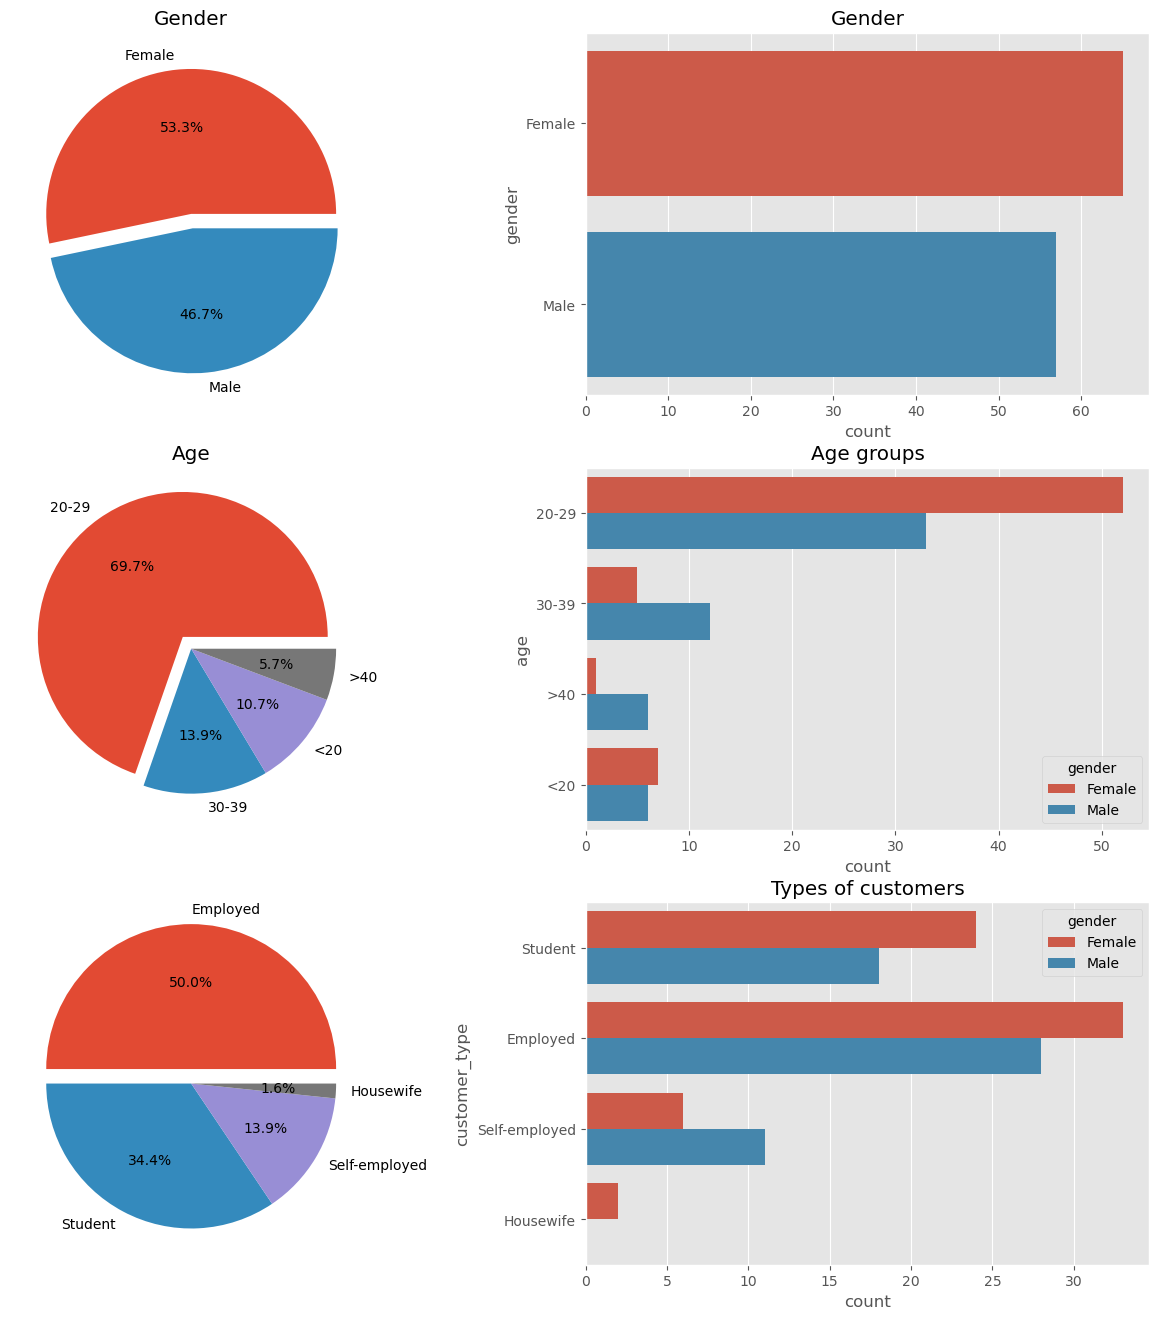

In [26]:
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
plt.pie(gender, labels = gender.index, autopct = '%1.1f%%', explode = [0, 0.1])
plt.title("Gender")

plt.subplot(3,2,2)
sns.countplot(y = "gender", data=df)
plt.title("Gender")

plt.subplot(3,2,3)
plt.pie(age, labels = age.index,autopct = '%1.1f%%', explode = [0.1, 0, 0, 0])
plt.title("Age")

plt.subplot(3,2,4)
sns.countplot(y= "age", data=df, hue="gender")
plt.title("Age groups")

plt.subplot(3,2,5)
plt.pie(customers, labels = customers.index, autopct = '%1.1f%%', explode = [0.1, 0, 0, 0])

plt.subplot(3,2,6)
sns.countplot(y= "customer_type", data=df, hue ="gender")
plt.title("Types of customers")


#### - 53.3% of the Coffee House customers are female.
#### - More than 69% of the customers are in the age group of 20-29 being 61% of them female.
#### - 50% of the customers of Coffee House are employed ones followed by students with 34%.
### =======================================================================================

In [27]:
loyalty = df["loyalty"].value_counts(normalize = True)*100
loyalty

True     77.04918
False    22.95082
Name: loyalty, dtype: float64

In [28]:
list = ["gender","age","customer_type"]
for i in list:
    print("-----------{}------------".format(i))
    print(df.groupby("loyalty")[i].value_counts(normalize=True)*100,end = "\n\n")

-----------gender------------
loyalty  gender
False    Female    53.571429
         Male      46.428571
True     Female    53.191489
         Male      46.808511
Name: gender, dtype: float64

-----------age------------
loyalty  age  
False    20-29    78.571429
         <20      10.714286
         30-39     7.142857
         >40       3.571429
True     20-29    67.021277
         30-39    15.957447
         <20      10.638298
         >40       6.382979
Name: age, dtype: float64

-----------customer_type------------
loyalty  customer_type
False    Student          50.000000
         Employed         42.857143
         Self-employed     7.142857
True     Employed         52.127660
         Student          29.787234
         Self-employed    15.957447
         Housewife         2.127660
Name: customer_type, dtype: float64



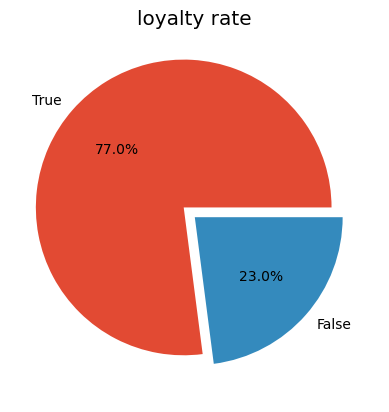

Text(0.5, 1.0, 'customers loyalty by type')

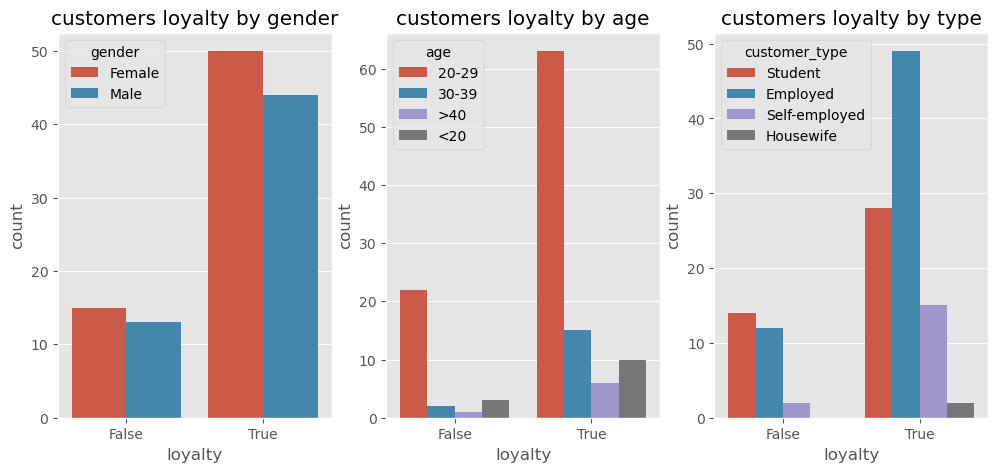

In [29]:
plt.pie(loyalty, labels = loyalty.index,autopct = '%1.1f%%', explode = [0.1, 0])
plt.title("loyalty rate")
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.countplot(df.loyalty,hue=df.gender)
plt.title("customers loyalty by gender")

plt.subplot(1,3,2)
sns.countplot(df.loyalty,hue=df.age)
plt.title("customers loyalty by age")

plt.subplot(1,3,3)
sns.countplot(df.loyalty,hue=df["customer_type"])
plt.title("customers loyalty by type")

#### - 77% of the customers will choose Coffee House in the future.
#### - Among the loyal customers :
- 53% are female
- 67% in the age-group 20-29
- 52% are employed

#### - Among the customers who doesnt return to coffee house
- 53.5% are female
- 78.5% are in the age- group 20-29
- 50% are students

### =======================================================================================

In [30]:
df["annual_income"].value_counts(normalize = True)*100

< 25000 RM              58.196721
25000 - 50000 (RM)      20.491803
50000 - 100000 (RM)     13.934426
> 150000 (RM)            4.918033
100000 - 150000 (RM)     2.459016
Name: annual_income, dtype: float64

Text(0.5, 1.0, 'Annual Income of customers')

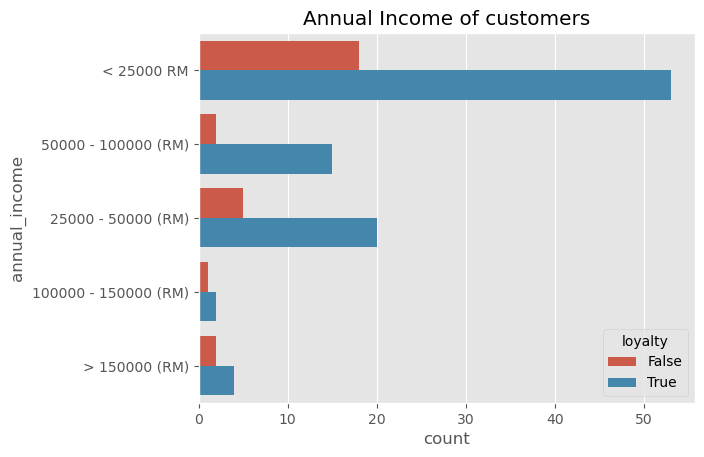

In [31]:
sns.countplot(y= "annual_income", data=df, hue='loyalty')
plt.title("Annual Income of customers")

#### - 58.19 % of the Coffee House customers have an annual income less than 25000 RM
### =======================================================================================

In [32]:
visits = df["visits"].value_counts()
visits

Rarely     76
Monthly    26
Weekly      9
Never       9
Daily       2
Name: visits, dtype: int64

In [33]:
drink_prefer = df["drink_preference"].value_counts()
drink_prefer

Take away     50
Dine in       46
Drive-thru    20
never          6
Name: drink_preference, dtype: int64

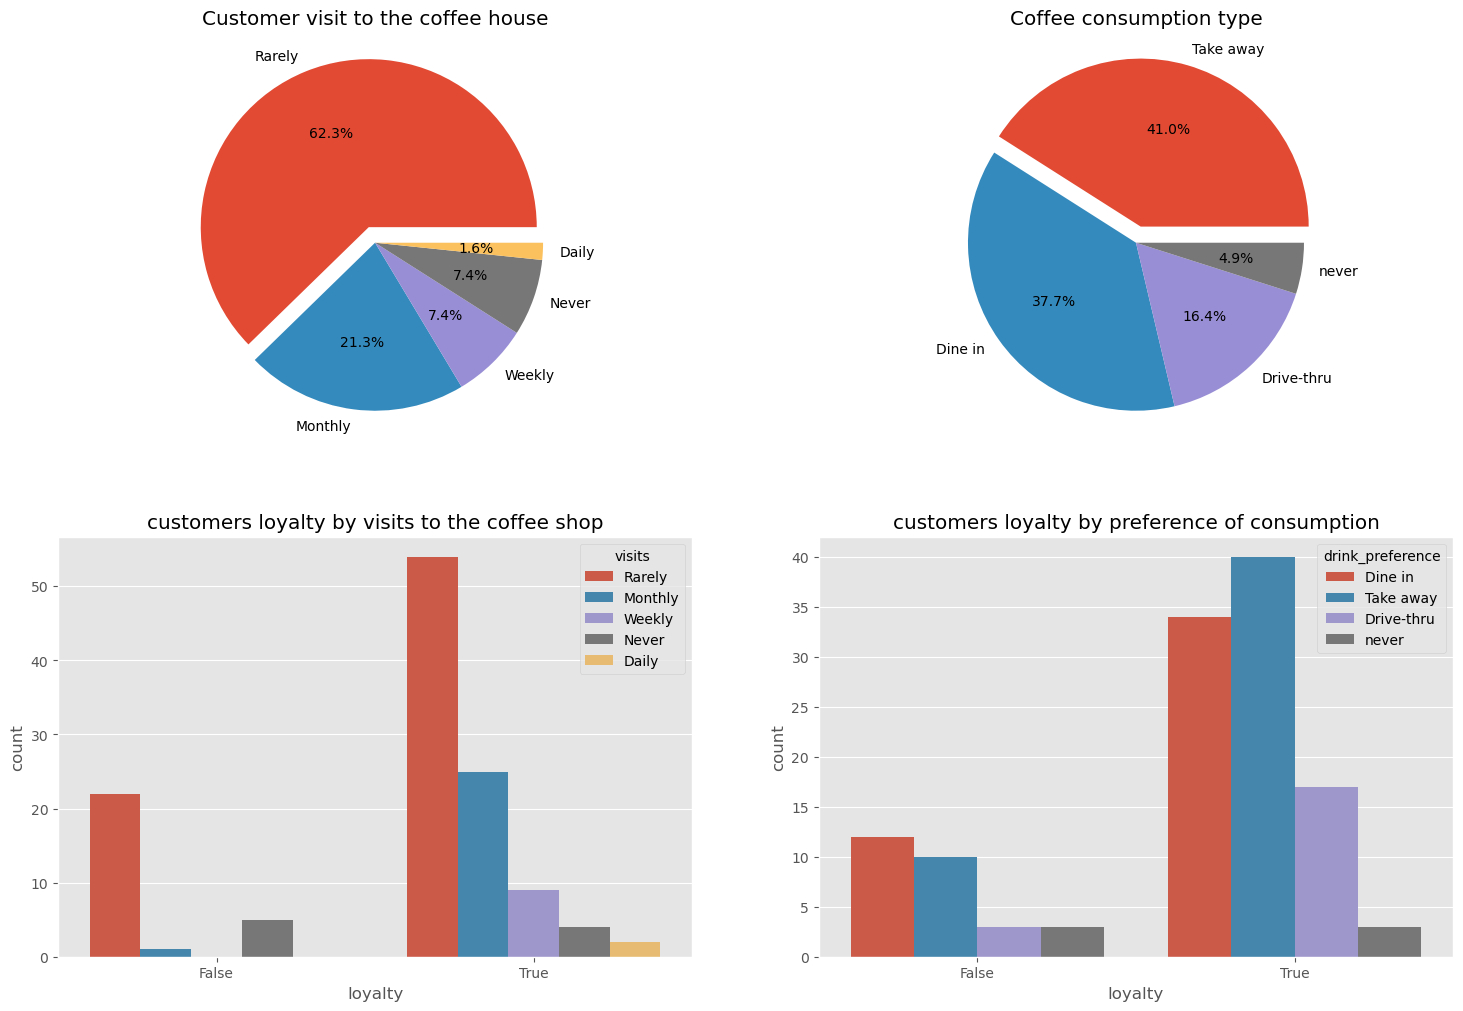

In [34]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.pie(visits, labels = visits.index, autopct = '%1.1f%%', explode = [0.1, 0, 0, 0,0])
plt.title("Customer visit to the coffee house")

plt.subplot(2,2,2)
plt.pie(drink_prefer, labels = drink_prefer.index, autopct = '%1.1f%%', explode = [0.1, 0, 0, 0])
plt.title("Coffee consumption type")

plt.subplot(2,2,3)
sns.countplot(df.loyalty,hue=df.visits)
plt.title("customers loyalty by visits to the coffee shop")

plt.subplot(2,2,4)
sns.countplot(df.loyalty,hue=df["drink_preference"])
plt.title("customers loyalty by preference of consumption")
plt.show()

#### - 62.3% of the customers rarely visit the Coffee House. 
#### - 41% of the customers like to opt take away and 37.7% chose to Dinein.
### =======================================================================================

In [35]:
time_spend = df["time_spend"].value_counts()
time_spend

< 30 m          73
30 m - 1 hr     34
1 hr - 2 hrs    12
>3 hrs           2
2 hrs - 3hrs     1
Name: time_spend, dtype: int64

In [36]:
outlet = df["nearest_outlet"].value_counts()
outlet

more than 3km    61
1km - 3km        34
within 1km       27
Name: nearest_outlet, dtype: int64

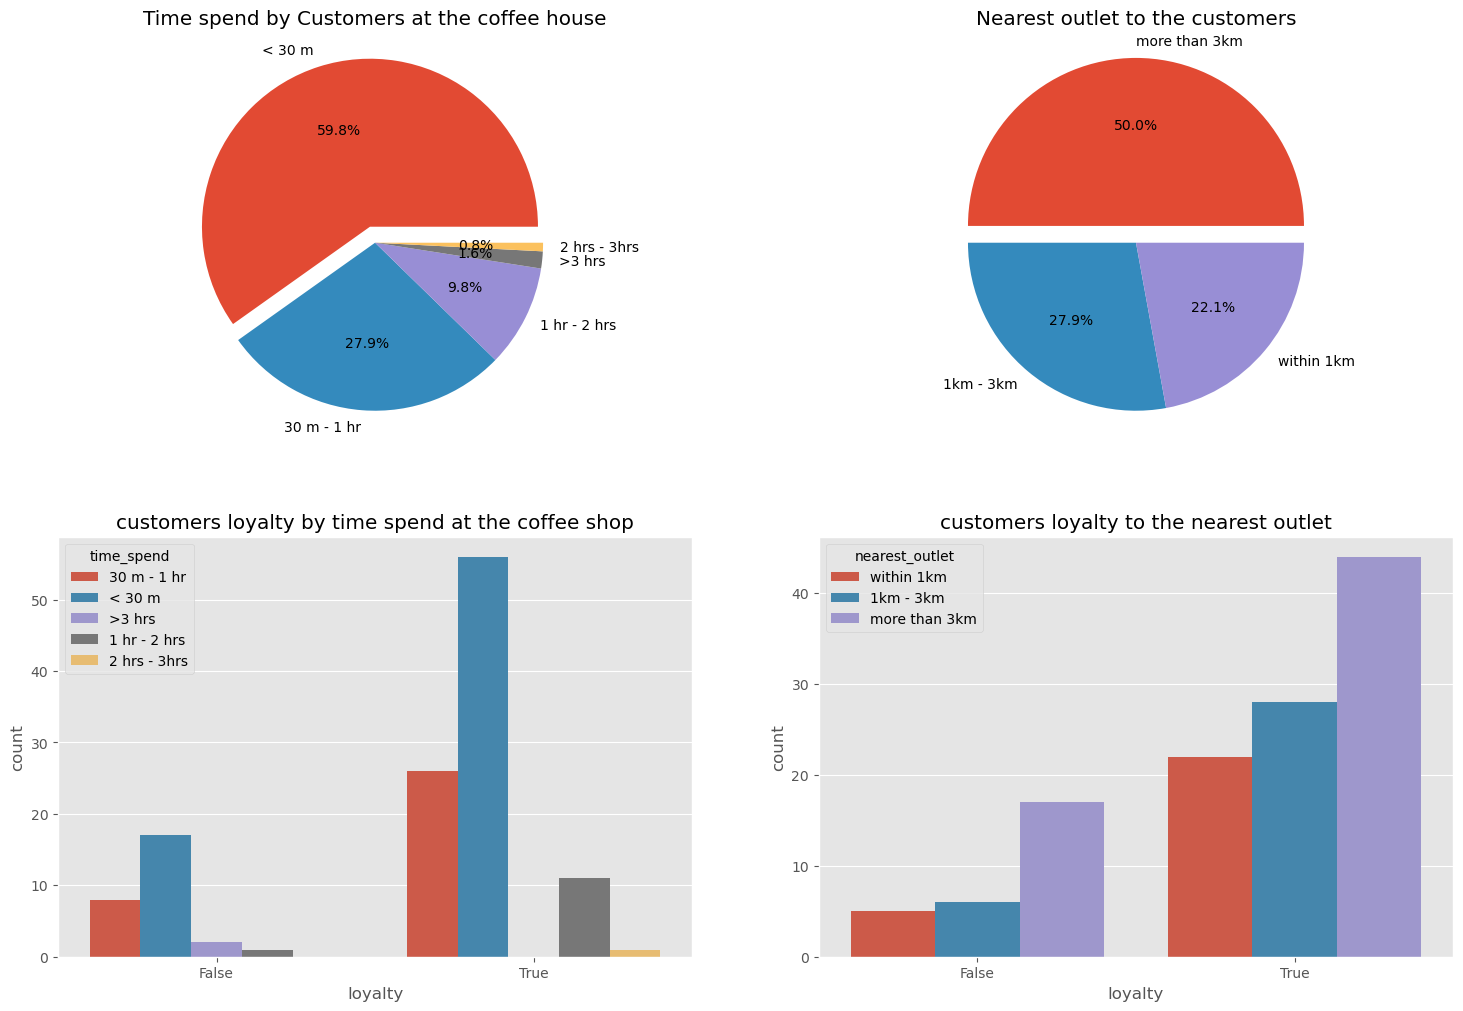

In [37]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.pie(time_spend, labels = time_spend.index, autopct = '%1.1f%%', explode = [0.1, 0, 0, 0,0])
plt.title("Time spend by Customers at the coffee house")

plt.subplot(2,2,2)
plt.pie(outlet, labels = outlet.index, autopct = '%1.1f%%', explode = [0.1, 0, 0])
plt.title("Nearest outlet to the customers")

plt.subplot(2,2,3)
sns.countplot(df.loyalty,hue=df["time_spend"])
plt.title("customers loyalty by time spend at the coffee shop")

plt.subplot(2,2,4)
sns.countplot(df.loyalty,hue=df["nearest_outlet"])
plt.title("customers loyalty to the nearest outlet")
plt.show()

#### - 59.8 % of the customers spend less than 30 minutes at the Coffee House
#### - 50% of the customers stays more than 3km away from the nearest outlet and only 22.1% stays within 1km.
### =======================================================================================

In [38]:
membership = df["membership"].value_counts()
membership_loyalty = df.groupby("loyalty")["membership"].value_counts(normalize=True)*100
membership_loyalty

loyalty  membership
False    False         82.142857
         True          17.857143
True     True          58.510638
         False         41.489362
Name: membership, dtype: float64

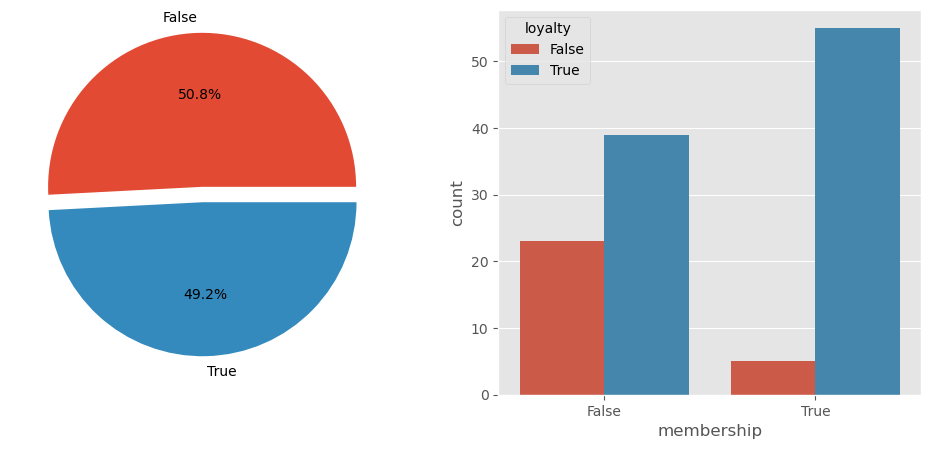

In [39]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(membership,labels = membership.index, autopct = '%1.1f%%', explode = [0.1, 0])

plt.subplot(1,2,2)
sns.countplot(df["membership"],hue=df.loyalty)
plt.show()

#### - 49.2% of the total customers have Coffee House membership card.
#### - And among them only 58.5% are loyal customers or the customers whose chances are high on visting the coffee house again.
### =======================================================================================

In [40]:
df['most_bought'].values

array(['Coffee', 'Cold drinks;Pastries', 'Coffee', 'Coffee',
       'Coffee;Sandwiches', 'Cold drinks', 'Coffee', 'Coffee;Cold drinks',
       'Cold drinks', 'Coffee', 'Cold drinks', 'Coffee',
       'Coffee;Sandwiches', 'Coffee', 'Coffee', 'Coffee', 'Coffee',
       'Coffee', 'Coffee', 'Cold drinks', 'Coffee', 'Coffee', 'Coffee',
       'Cold drinks;Pastries;Sandwiches',
       'Coffee;Juices;Pastries;Sandwiches', 'Coffee;Cold drinks',
       'Coffee', 'Coffee', 'Coffee', 'Coffee',
       'Coffee;Pastries;Sandwiches', 'Coffee;Pastries', 'Coffee',
       'Coffee', 'Coffee', 'Coffee', 'Cold drinks', 'Coffee',
       'Cold drinks;Juices;Pastries', 'Coffee', 'Coffee', 'Coffee',
       'Coffee', 'Coffee;Pastries', 'Coffee', 'Coffee;Pastries',
       'Cold drinks', 'Coffee', 'Cold drinks', 'Cold drinks', 'Coffee',
       'Cold drinks', 'Cold drinks;Juices;Pastries', 'Coffee', 'Coffee',
       'Coffee', 'Coffee;Cold drinks', 'Coffee', 'Coffee', 'Cold drinks',
       'Coffee', 'Coffee;Cold dr

In [41]:
item_list = []
for item in df["most_bought"].str.split(";"):
    for i in item:
        item_list.append(i)
item_list

['Coffee',
 'Cold drinks',
 'Pastries',
 'Coffee',
 'Coffee',
 'Coffee',
 'Sandwiches',
 'Cold drinks',
 'Coffee',
 'Coffee',
 'Cold drinks',
 'Cold drinks',
 'Coffee',
 'Cold drinks',
 'Coffee',
 'Coffee',
 'Sandwiches',
 'Coffee',
 'Coffee',
 'Coffee',
 'Coffee',
 'Coffee',
 'Coffee',
 'Cold drinks',
 'Coffee',
 'Coffee',
 'Coffee',
 'Cold drinks',
 'Pastries',
 'Sandwiches',
 'Coffee',
 'Juices',
 'Pastries',
 'Sandwiches',
 'Coffee',
 'Cold drinks',
 'Coffee',
 'Coffee',
 'Coffee',
 'Coffee',
 'Coffee',
 'Pastries',
 'Sandwiches',
 'Coffee',
 'Pastries',
 'Coffee',
 'Coffee',
 'Coffee',
 'Coffee',
 'Cold drinks',
 'Coffee',
 'Cold drinks',
 'Juices',
 'Pastries',
 'Coffee',
 'Coffee',
 'Coffee',
 'Coffee',
 'Coffee',
 'Pastries',
 'Coffee',
 'Coffee',
 'Pastries',
 'Cold drinks',
 'Coffee',
 'Cold drinks',
 'Cold drinks',
 'Coffee',
 'Cold drinks',
 'Cold drinks',
 'Juices',
 'Pastries',
 'Coffee',
 'Coffee',
 'Coffee',
 'Coffee',
 'Cold drinks',
 'Coffee',
 'Coffee',
 'Cold drinks

In [42]:
new_list = ['Never' if x in ["Never buy any", "never","Nothing"] else x for x in item_list]
new_list=pd.Series(new_list).value_counts()
new_list

Coffee         84
Cold drinks    38
Pastries       16
Sandwiches      8
Never           5
Juices          4
Jaws chip       1
cake            1
dtype: int64

<AxesSubplot:>

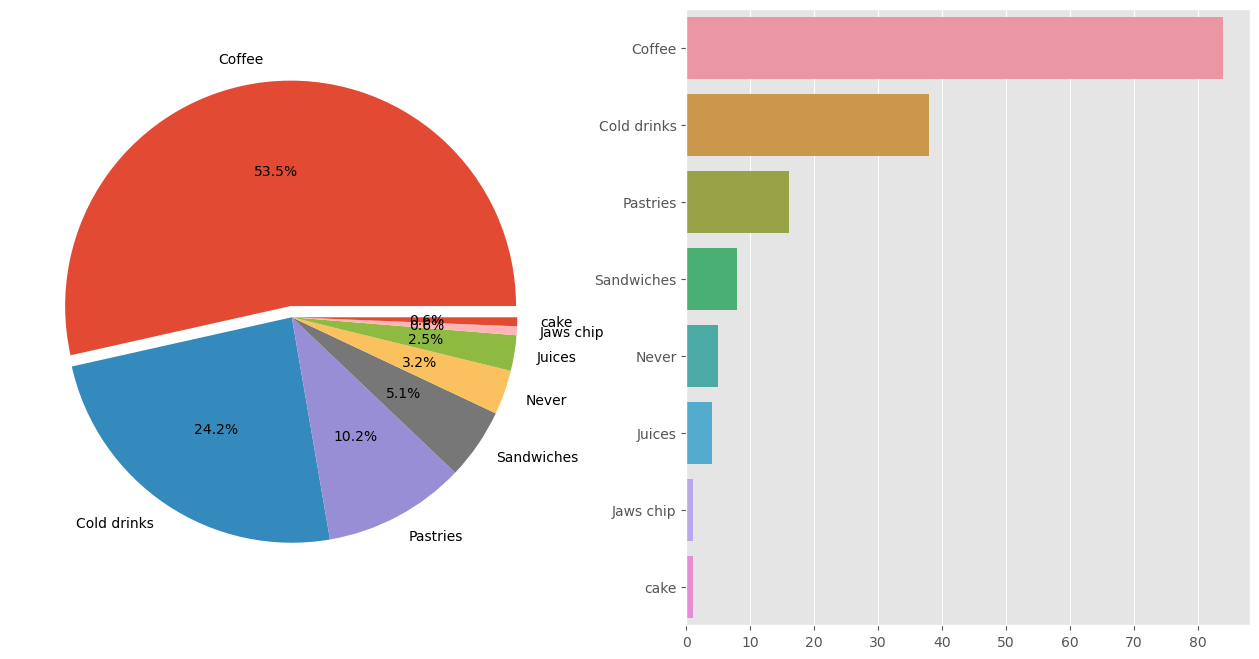

In [43]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.pie(new_list,labels = new_list.index, autopct = '%1.1f%%', explode = [0.05,0,0,0,0,0,0,0])

plt.subplot(1,2,2)
sns.barplot(new_list.values,new_list.index)

#### - 53.5% of the customers ordered coffee followed by cold drinks(24.2%).
### =======================================================================================

In [44]:
df["spend_per_visit"].value_counts(normalize=True)*100

< 20 RM         47.540984
20 - 40 (RM)    36.885246
0                9.836066
>40 (RM)         5.737705
Name: spend_per_visit, dtype: float64

<AxesSubplot:xlabel='spend_per_visit', ylabel='count'>

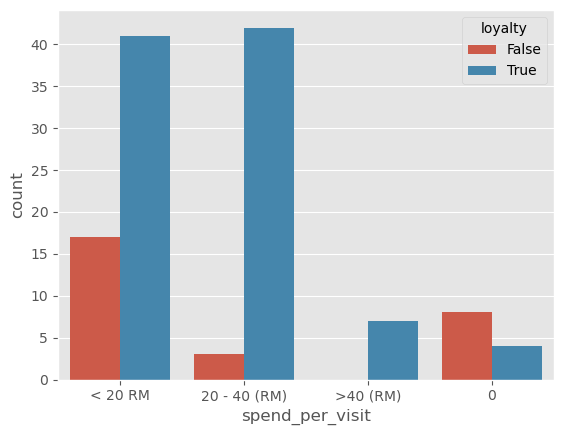

In [45]:
sns.countplot(df["spend_per_visit"],hue=df.loyalty)

#### - More than 47% of the customers spend  less than 20 RM per visit.
### =======================================================================================

In [46]:
promotion_list = []
for item in df["promotion_updates"].str.split(";"):
    for i in item:
        promotion_list.append(i)
promotion_list = pd.Series(promotion_list).value_counts()
promotion_list

Social Media                         90
Through friends and word of mouth    49
Starbucks Website/Apps               35
In Store displays                    21
Emails                               18
Billboards                           11
Deal sites (fave, iprice, etc...)     7
Application offer                     1
Never hear                            1
dtype: int64

<AxesSubplot:>

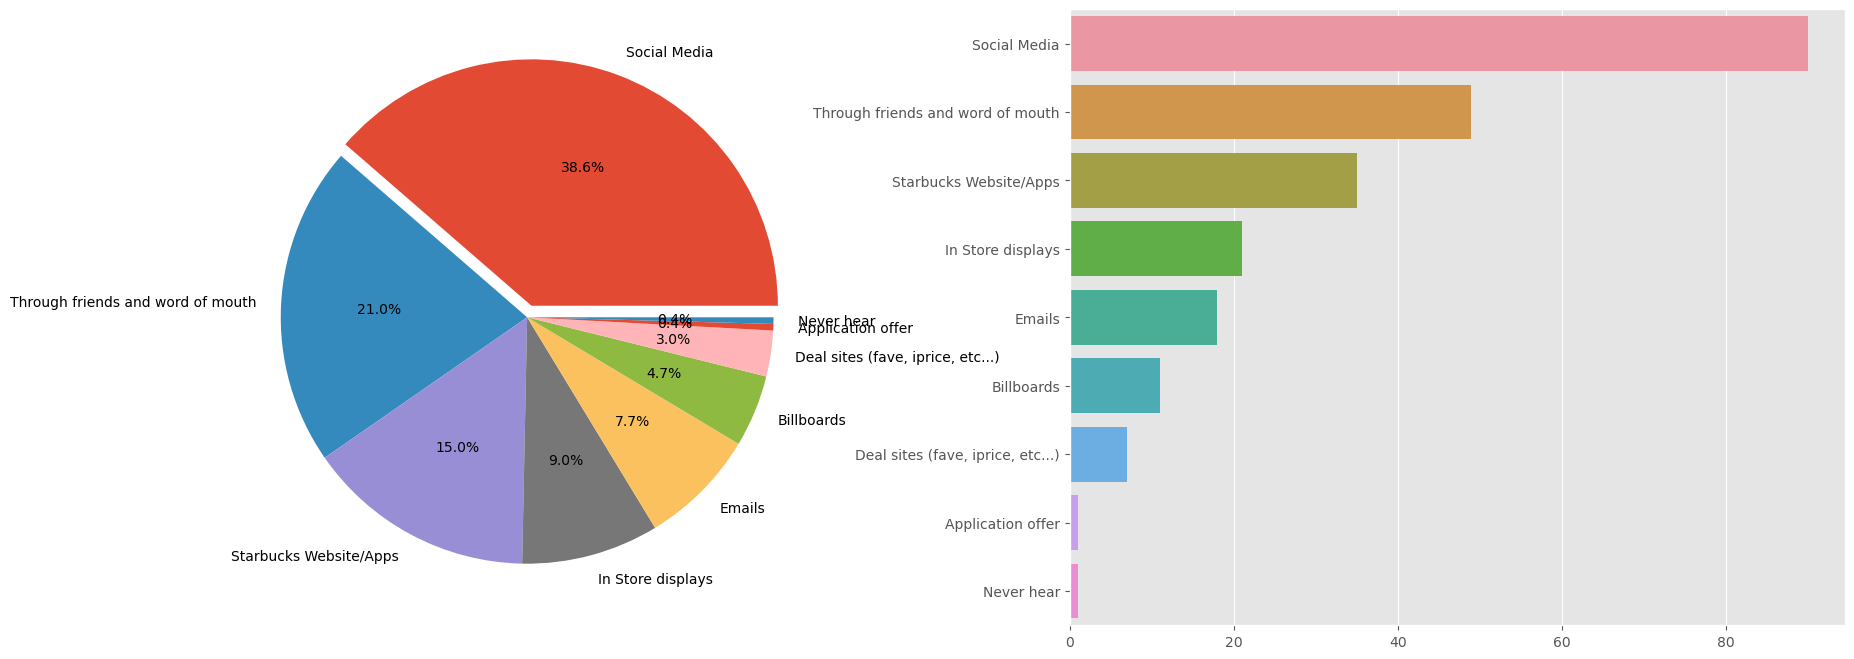

In [47]:
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
plt.pie(promotion_list,labels = promotion_list.index, autopct = '%1.1f%%', explode = [0.05,0,0,0,0,0,0,0,0])

plt.subplot(1,2,2)
sns.barplot(promotion_list.values,promotion_list.index)

####  - 38.6% of the customers get to know about the promotion through social media and 21% through friends and word of mouth
### =======================================================================================

In [48]:
x = df['prefer_coffee_house'].value_counts()
print("percentage of customers who  will choose Coffee House for doing business meetings or hangout with friends : ",round((x.iloc[x.index>=3].sum()/len(df))*100,2))

percentage of customers who  will choose Coffee House for doing business meetings or hangout with friends :  84.43


#### - 84.43% of the customers rated 3 and more for choosing Coffee House for doing business meetings or hangout with friends
### =======================================================================================

In [49]:
ratings = df[['quality_rating', 'price_rating',
       'promotion_rating', 'ambience_rating', 'wifi_rating', 'service_rating',"prefer_coffee_house"]]
ratings.head()

,quality_rating,price_rating,promotion_rating,ambience_rating,wifi_rating,service_rating,prefer_coffee_house
0,4,3,5,5,4,4,3
1,4,3,4,4,4,5,2
2,4,3,4,4,4,4,3
3,2,1,4,3,3,3,3
4,3,3,4,2,2,3,3


In [50]:
for i in ratings:
    x = df[i].value_counts()
    print("--------- {}-----------".format(i),end="\n")
    print(x)
    print("percentage of customers who rated >3 : ",round((x.iloc[x.index>3].sum()/len(df))*100,2),"\n")

--------- quality_rating-----------
4    49
3    39
5    23
2     8
1     3
Name: quality_rating, dtype: int64
percentage of customers who rated >3 :  59.02 

--------- price_rating-----------
3    48
2    27
4    24
1    14
5     9
Name: price_rating, dtype: int64
percentage of customers who rated >3 :  27.05 

--------- promotion_rating-----------
4    42
5    37
3    30
2     7
1     6
Name: promotion_rating, dtype: int64
percentage of customers who rated >3 :  64.75 

--------- ambience_rating-----------
4    52
3    35
5    26
2     6
1     3
Name: ambience_rating, dtype: int64
percentage of customers who rated >3 :  63.93 

--------- wifi_rating-----------
3    54
4    38
2    13
5    10
1     7
Name: wifi_rating, dtype: int64
percentage of customers who rated >3 :  39.34 

--------- service_rating-----------
4    51
3    43
5    23
2     4
1     1
Name: service_rating, dtype: int64
percentage of customers who rated >3 :  60.66 

--------- prefer_coffee_house-----------
4    42
3

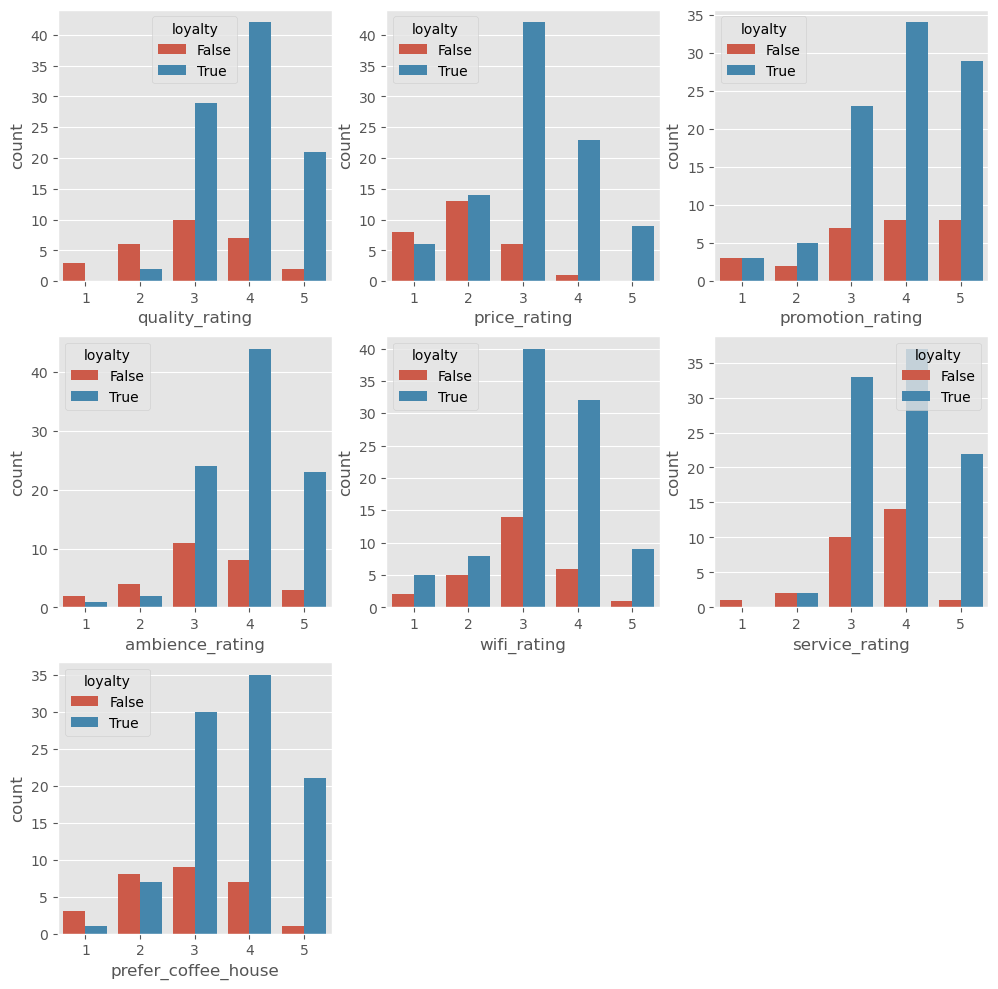

In [51]:
plt.figure(figsize=(12,12))
for i in range(0,7):
    plt.subplot(3,3,i+1)
    sns.countplot(ratings.iloc[:,i],hue=df.loyalty)
plt.show()

In [52]:
ratings.describe()

,quality_rating,price_rating,promotion_rating,ambience_rating,wifi_rating,service_rating,prefer_coffee_house
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,3.663934,2.893443,3.795082,3.754098,3.254098,3.745902,3.516393
std,0.941343,1.081836,1.090443,0.929867,0.958317,0.828834,1.030394
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### - Percentage of customers who gave an average rating of > 3 for the following services
- quality_rating    : 59.02
- price_rating	    : 27.05
- promotion_rating	: 64.75
- ambience_rating	: 63.93
- wifi_rating	    : 39.34
- service_rating    : 60.66
- prefer coffee house : 52.46

### =======================================================================================

<AxesSubplot:>

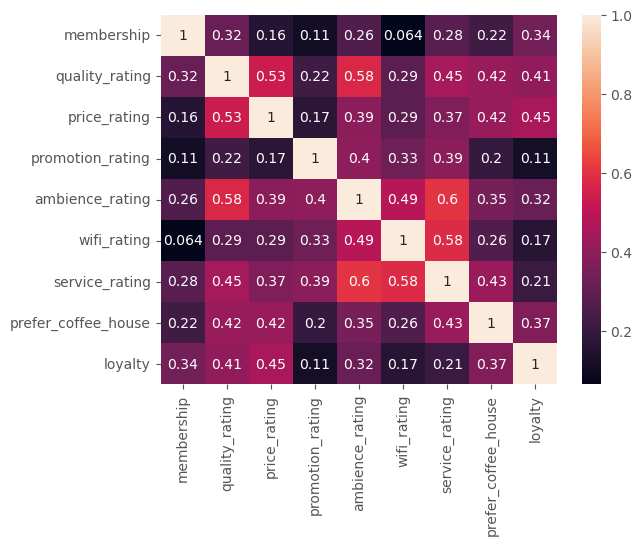

In [53]:
sns.heatmap(df.corr(),annot= True)

### understanding the factors contributing to the decline in retention rates by analyzing the customers who will not buy from coffee house in future.

In [54]:
newdf = df[df.loyalty == False]
newdf.head()

,gender,age,customer_type,annual_income,visits,drink_preference,time_spend,nearest_outlet,membership,most_bought,spend_per_visit,quality_rating,price_rating,promotion_rating,ambience_rating,wifi_rating,service_rating,prefer_coffee_house,promotion_updates,loyalty
3,Female,20-29,Student,< 25000 RM,Rarely,Take away,< 30 m,more than 3km,False,Coffee,< 20 RM,2,1,4,3,3,3,3,Through friends and word of mouth,False
11,Female,20-29,Student,< 25000 RM,Rarely,Dine in,30 m - 1 hr,more than 3km,False,Coffee,< 20 RM,3,2,4,4,3,4,4,Starbucks Website/Apps;Social Media;Through fr...,False
14,Female,20-29,Student,< 25000 RM,Rarely,Take away,< 30 m,within 1km,True,Coffee,< 20 RM,5,2,5,5,5,5,2,Social Media;Through friends and word of mouth...,False
15,Female,20-29,Employed,< 25000 RM,Rarely,Take away,30 m - 1 hr,more than 3km,True,Coffee,< 20 RM,4,1,5,4,3,4,4,Starbucks Website/Apps,False
20,Male,30-39,Employed,100000 - 150000 (RM),Rarely,Take away,< 30 m,within 1km,True,Coffee,20 - 40 (RM),2,2,5,3,3,4,3,Social Media;Emails,False


In [55]:
for i in ratings:
    x = newdf[i].value_counts()
    print("--------- {}-----------".format(i),end="\n")
    print(x)
    print("percentage of customers who rated >3 : ",round((x.iloc[x.index>3].sum()/len(newdf))*100,2),"\n")

--------- quality_rating-----------
3    10
4     7
2     6
1     3
5     2
Name: quality_rating, dtype: int64
percentage of customers who rated >3 :  32.14 

--------- price_rating-----------
2    13
1     8
3     6
4     1
Name: price_rating, dtype: int64
percentage of customers who rated >3 :  3.57 

--------- promotion_rating-----------
4    8
5    8
3    7
1    3
2    2
Name: promotion_rating, dtype: int64
percentage of customers who rated >3 :  57.14 

--------- ambience_rating-----------
3    11
4     8
2     4
5     3
1     2
Name: ambience_rating, dtype: int64
percentage of customers who rated >3 :  39.29 

--------- wifi_rating-----------
3    14
4     6
2     5
1     2
5     1
Name: wifi_rating, dtype: int64
percentage of customers who rated >3 :  25.0 

--------- service_rating-----------
4    14
3    10
2     2
5     1
1     1
Name: service_rating, dtype: int64
percentage of customers who rated >3 :  53.57 

--------- prefer_coffee_house-----------
3    9
2    8
4    7
1  

<AxesSubplot:>

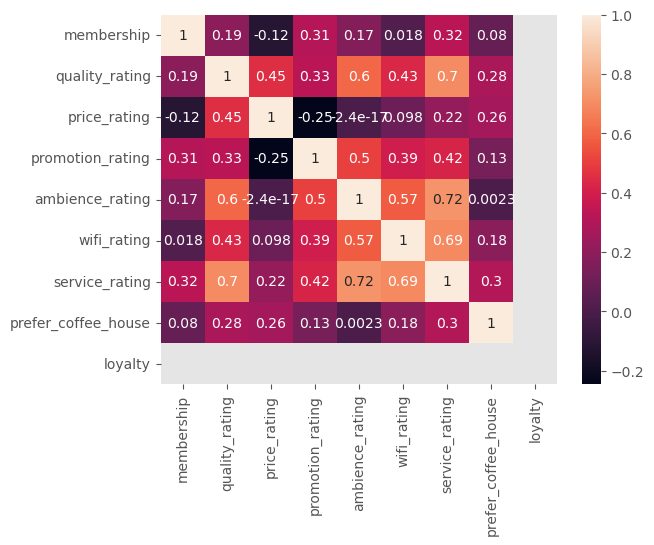

In [56]:
sns.heatmap(newdf.corr(),annot=True)

In [57]:
newdf.describe()

,quality_rating,price_rating,promotion_rating,ambience_rating,wifi_rating,service_rating,prefer_coffee_house
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,2.964286,2.000000,3.571429,3.214286,2.964286,3.428571,2.821429
std,1.104943,0.816497,1.288944,1.066567,0.922241,0.835711,1.055973
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,3.000000,3.000000,2.750000,3.000000,2.000000
50%,3.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000
75%,4.000000,2.250000,5.000000,4.000000,3.250000,4.000000,4.000000
max,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### - Ratings of the non loyal customers (ratings >3)
    - quality_rating : 32.14% with an average rating of 2.96
    - price_rating   : 3.57% with an average rating of 2
    - promotion_rating  : 57.14% with an average rating of 3.57
    - ambience_rating   : 39.29% with an average rating of 3.21
    - wifi_rating	 : 25% with an average rating of 2.96
    - service_rating  : 53.57% with an average rating of 3.42
    - prefer coffee house : 28.57% with an average rating of 2.82
## =======================================================================

In [60]:
df.to_csv("coffee_house_updated.csv",index=False)